In [13]:
import sys
from call_system_command import call_system_command
import matplotlib.pyplot as plt

sys.path.append('/Users/Simon/GIT/GPlatesClassStruggle/')
from reconstruction_classes import *
from raster_reconstruction_classes import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

#plt.style.use(['dark_background'])

paleotopography_grid_template = '/Users/Simon/cloudstor/Shared/Paleotopography_Grids/paleotopobathy_smooth_%0.2fMa.nc'



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


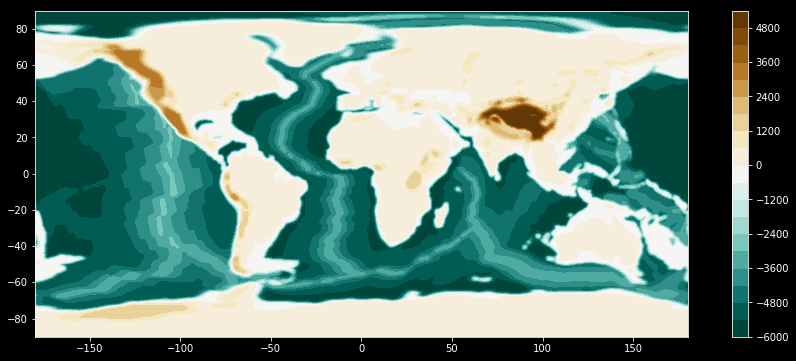

In [14]:
ptopo = GplatesRaster(paleotopography_grid_template % 20)

ptopo.plot()


In [9]:
results = []

for reconstruction_time in np.arange(0,231,1):
    
    result = call_system_command(['gmt','grdvolume',
                                  paleotopography_grid_template % reconstruction_time,
                                  '-C0.', '-Sk'],return_stdout = True)

    results.append([float(string) for string in result.split()])


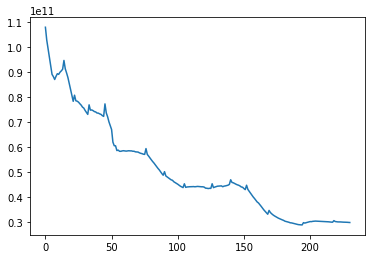

In [10]:
plt.plot(zip(*results)[2])


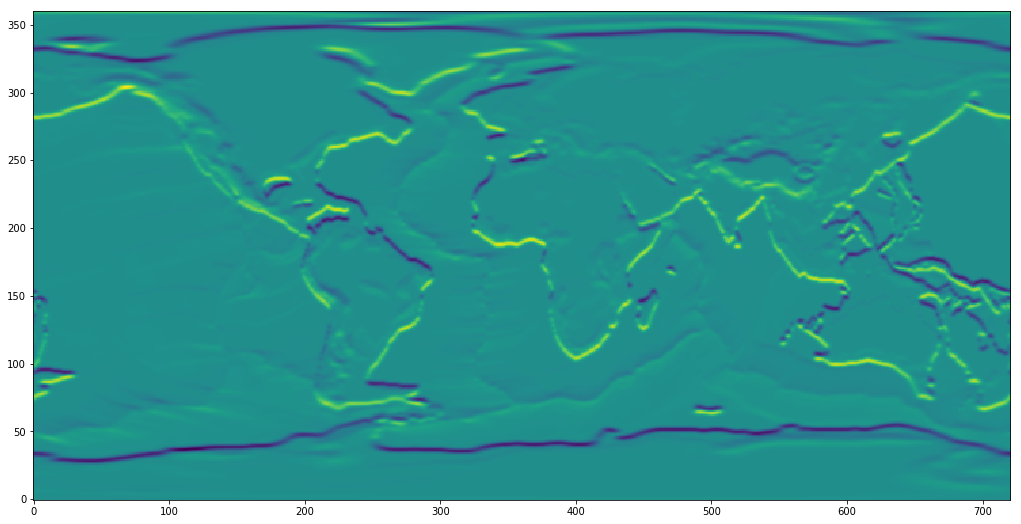

In [12]:
import numpy as np

ptopo = GplatesRaster(paleotopography_grid_template % 5)
plt.figure(figsize=(20,9))
plt.imshow(np.gradient(ptopo.gridZ,axis=0),origin='lower')
